In [1]:
!pip install wordcloud

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
data=pd.read_excel('구글검색결과제목.xlsx')
data.head()

,제목
0,"4조 육아시장 어떻게 잡나, 육아맘 주 이용 채널 분석하기"
1,"위메프 ""유아용품 온라인으로 대량 구매하는 소비자 늘어"""
2,중국 영유아용품 시장 최신 트렌드 - Kotra 해외시장뉴스
3,美 유아용품 온라인쇼핑으로 성장세 지속 - 트렌드 - Kotra 해외 ...
4,美 유아용품 온라인쇼핑으로 성장세 지속 - Kotra 해외시장뉴스


In [4]:
#경고제어
import warnings
warnings.simplefilter("ignore") # 일치하는 경고 인쇄 x, simplefilter : 경고 필터 명세 목록에 간단한 항목을 삽입

#텍스트 분석에 필요한 konlpy 불러오기 및 버전 확인
import konlpy
konlpy.__version__

'0.5.2'

In [5]:
#KoNLPy의 OKT(형태소 분석기) 불러오기
from konlpy.tag import Okt

okt=Okt()
print(okt.pos("안녕하세요"))

[('안녕하세요', 'Adjective')]


In [6]:
!pip install nltk

In [7]:
import nltk
from konlpy.tag import Okt
t=Okt()

In [11]:
data['제목'].astype('str')

0                4조 육아시장 어떻게 잡나, 육아맘 주 이용 채널 분석하기
1                 위메프 "유아용품 온라인으로 대량 구매하는 소비자 늘어"
2               중국 영유아용품 시장 최신 트렌드 - Kotra 해외시장뉴스
3      美 유아용품 온라인쇼핑으로 성장세 지속 - 트렌드 - Kotra 해외 ...
4            美 유아용품 온라인쇼핑으로 성장세 지속 - Kotra 해외시장뉴스
                          ...                    
384         2020년 이커머스 트렌드 중간점검 : 코로나19 이후 위기와 기회
385        5년 후 세계 위기는 공평하게 다가온다 - Google 도서 검색결과
386                          스틸러 - Google 도서 검색결과
387                      마케팅의 정석 - Google 도서 검색결과
388             주식투자 - 유망종목 가이드 북: 주식투자 여기서만 해라!!
Name: 제목, Length: 389, dtype: object

In [12]:
content_text=''

for each_line in data['제목'].astype('str'):
    content_text=content_text + each_line + '\n'

In [13]:
print(data.제목)

0                4조 육아시장 어떻게 잡나, 육아맘 주 이용 채널 분석하기
1                 위메프 "유아용품 온라인으로 대량 구매하는 소비자 늘어"
2               중국 영유아용품 시장 최신 트렌드 - Kotra 해외시장뉴스
3      美 유아용품 온라인쇼핑으로 성장세 지속 - 트렌드 - Kotra 해외 ...
4            美 유아용품 온라인쇼핑으로 성장세 지속 - Kotra 해외시장뉴스
                          ...                    
384         2020년 이커머스 트렌드 중간점검 : 코로나19 이후 위기와 기회
385        5년 후 세계 위기는 공평하게 다가온다 - Google 도서 검색결과
386                          스틸러 - Google 도서 검색결과
387                      마케팅의 정석 - Google 도서 검색결과
388             주식투자 - 유망종목 가이드 북: 주식투자 여기서만 해라!!
Name: 제목, Length: 389, dtype: object


In [14]:
tokens_ko=t.morphs(content_text)
tokens_ko

['4조',
 '육아',
 '시장',
 '어떻게',
 '잡',
 '나',
 ',',
 '육아',
 '맘',
 '주',
 '이용',
 '채널',
 '분석',
 '하기',
 '\n',
 '위메프',
 '"',
 '유아',
 '용품',
 '온라인',
 '으로',
 '대량',
 '구매',
 '하는',
 '소비자',
 '늘어',
 '"',
 '\n',
 '중국',
 '영',
 '유아',
 '용품',
 '시장',
 '최신',
 '트렌드',
 '-',
 'Kotra',
 '해외',
 '시장',
 '뉴스',
 '\n',
 '美',
 '유아',
 '용품',
 '온라인쇼핑',
 '으로',
 '성장',
 '세',
 '지속',
 '-',
 '트렌드',
 '-',
 'Kotra',
 '해외',
 '...',
 '\n',
 '美',
 '유아',
 '용품',
 '온라인쇼핑',
 '으로',
 '성장',
 '세',
 '지속',
 '-',
 'Kotra',
 '해외',
 '시장',
 '뉴스',
 '\n',
 '中',
 '영',
 '유아',
 '시장',
 ',',
 "'",
 '온라인',
 "'",
 '으로',
 '통한',
 '다',
 '!',
 '-',
 '트렌드',
 '-',
 'KOTRA',
 '해외',
 '시장',
 '...',
 '\n',
 '일본',
 '유아',
 '용품',
 '산업',
 '-',
 '국별',
 '주요',
 '산업',
 '-',
 'Kotra',
 '해외',
 '시장',
 '뉴스',
 '\n',
 '아이',
 '1',
 '명도',
 '안',
 '낳는데',
 '…',
 '유아',
 '용품',
 '산업',
 '은',
 '왜',
 '흔들리지',
 '않을까',
 '\n',
 '세계',
 '의',
 '유아',
 '용품',
 '온라인',
 '소매',
 '시장',
 '(',
 '2021-2025년',
 ')',
 '-',
 '글로벌',
 '...',
 '\n',
 '유아',
 '용품',
 '온라인',
 '시장',
 '커진다',
 '-',
 '어',
 '패럴',
 '뉴스',
 '\

In [15]:
ko=nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

5263
1173


In [16]:
ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200) # 가장 많이 나온 단어 200개

[('\n', 389),
 ('-', 304),
 ('시장', 270),
 ('용품', 241),
 ('유아', 240),
 (',', 127),
 ('...', 106),
 ('해외', 88),
 ("'", 78),
 ('뉴스', 72),
 ('중국', 62),
 ('트렌드', 56),
 ('온라인', 51),
 ('Kotra', 47),
 ('동향', 45),
 ('[', 43),
 (']', 43),
 ('KOTRA', 39),
 ('영', 35),
 ('의', 31),
 ('성장', 27),
 ('…', 26),
 ('·', 26),
 ('산업', 24),
 ('온라인쇼핑', 22),
 ('한', 22),
 ('이', 22),
 ('세', 19),
 ('한국', 19),
 ('을', 19),
 ('에', 19),
 ('상품', 18),
 ('쇼핑몰', 18),
 ('공략', 18),
 ('으로', 16),
 ('(', 16),
 ('및', 16),
 ('"', 15),
 ('|', 15),
 ('베이비', 15),
 (')', 14),
 ('글로벌', 14),
 ('업계', 14),
 ('로', 14),
 (':', 14),
 ('서', 14),
 ('구매', 13),
 ('코로나', 13),
 ('프리미엄', 13),
 ('영유', 13),
 ('아', 13),
 ('대', 13),
 ('육아용품', 13),
 ('경제', 13),
 ('진출', 13),
 ('쇼핑', 13),
 ('中', 12),
 ('세계', 12),
 ('식품', 12),
 ('유망', 12),
 ('통계청', 12),
 ('보고서', 12),
 ('/', 12),
 ('>', 12),
 ('분석', 11),
 ('美', 10),
 ('은', 10),
 ('스마트', 10),
 ('싱가포르', 10),
 ('현황', 10),
 ('?', 10),
 ('무역', 10),
 ('거래', 10),
 ('시', 10),
 ('육아', 9),
 ('최신', 9),
 ('지속', 9),
 

In [17]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','를','2017','들','데','..','의','때','겠','고','게','네요','한','일','할','10','?','하는','06','주','려고','인데','거','좀','는데','-','ㅎㅎ','하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','지','있','못','후','중','줄','6','과','어떤','기본','!!','단어','라고','중요한','합','가요','....','보이','네','무지','"'"']

tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200)

[('\n', 389),
 ('시장', 270),
 ('용품', 241),
 ('유아', 240),
 ('해외', 88),
 ("'", 78),
 ('뉴스', 72),
 ('중국', 62),
 ('트렌드', 56),
 ('온라인', 51),
 ('Kotra', 47),
 ('동향', 45),
 ('[', 43),
 (']', 43),
 ('KOTRA', 39),
 ('영', 35),
 ('성장', 27),
 ('…', 26),
 ('·', 26),
 ('산업', 24),
 ('온라인쇼핑', 22),
 ('세', 19),
 ('한국', 19),
 ('상품', 18),
 ('쇼핑몰', 18),
 ('공략', 18),
 ('(', 16),
 ('및', 16),
 ('"', 15),
 ('|', 15),
 ('베이비', 15),
 (')', 14),
 ('글로벌', 14),
 ('업계', 14),
 (':', 14),
 ('서', 14),
 ('구매', 13),
 ('코로나', 13),
 ('프리미엄', 13),
 ('영유', 13),
 ('아', 13),
 ('육아용품', 13),
 ('경제', 13),
 ('진출', 13),
 ('쇼핑', 13),
 ('中', 12),
 ('세계', 12),
 ('식품', 12),
 ('유망', 12),
 ('통계청', 12),
 ('보고서', 12),
 ('/', 12),
 ('>', 12),
 ('분석', 11),
 ('美', 10),
 ('스마트', 10),
 ('싱가포르', 10),
 ('현황', 10),
 ('무역', 10),
 ('거래', 10),
 ('시', 10),
 ('육아', 9),
 ('최신', 9),
 ('지속', 9),
 ('!', 9),
 ('정보', 9),
 ('협회', 9),
 ('대만', 9),
 ('&', 9),
 ('미국', 8),
 ('키즈', 8),
 ('저출산', 8),
 ('수출', 8),
 ('네이버', 8),
 ('베트남', 8),
 ('전략', 8),
 ('일보', 8),
 ('`',

In [20]:
review_stopwords=['\n','♥',':)','♡','<','br','>',':','D','!','+','원','넥','위','매','일','별','손','갈','부','플','nan','안',':))','터','티','기','나','반','극','!^_^','인','일','!<','에요','추천','연출']
for word in review_stopwords:
    stop_words.append(word)

In [21]:
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('시장', 270),
 ('용품', 241),
 ('유아', 240),
 ('해외', 88),
 ("'", 78),
 ('뉴스', 72),
 ('중국', 62),
 ('트렌드', 56),
 ('온라인', 51),
 ('Kotra', 47),
 ('동향', 45),
 ('[', 43),
 (']', 43),
 ('KOTRA', 39),
 ('영', 35),
 ('성장', 27),
 ('…', 26),
 ('·', 26),
 ('산업', 24),
 ('온라인쇼핑', 22),
 ('세', 19),
 ('한국', 19),
 ('상품', 18),
 ('쇼핑몰', 18),
 ('공략', 18),
 ('(', 16),
 ('및', 16),
 ('"', 15),
 ('|', 15),
 ('베이비', 15),
 (')', 14),
 ('글로벌', 14),
 ('업계', 14),
 ('서', 14),
 ('구매', 13),
 ('코로나', 13),
 ('프리미엄', 13),
 ('영유', 13),
 ('아', 13),
 ('육아용품', 13),
 ('경제', 13),
 ('진출', 13),
 ('쇼핑', 13),
 ('中', 12),
 ('세계', 12),
 ('식품', 12),
 ('유망', 12),
 ('통계청', 12),
 ('보고서', 12),
 ('/', 12),
 ('분석', 11),
 ('美', 10),
 ('스마트', 10),
 ('싱가포르', 10),
 ('현황', 10),
 ('무역', 10),
 ('거래', 10),
 ('시', 10),
 ('육아', 9),
 ('최신', 9),
 ('지속', 9),
 ('정보', 9),
 ('협회', 9),
 ('대만', 9),
 ('&', 9),
 ('미국', 8),
 ('키즈', 8),
 ('저출산', 8),
 ('수출', 8),
 ('네이버', 8),
 ('베트남', 8),
 ('전략', 8),
 ('일보', 8),
 ('`', 8),
 ('19', 7),
 ('전', 7),
 ('강세', 7),
 ('제품', 7

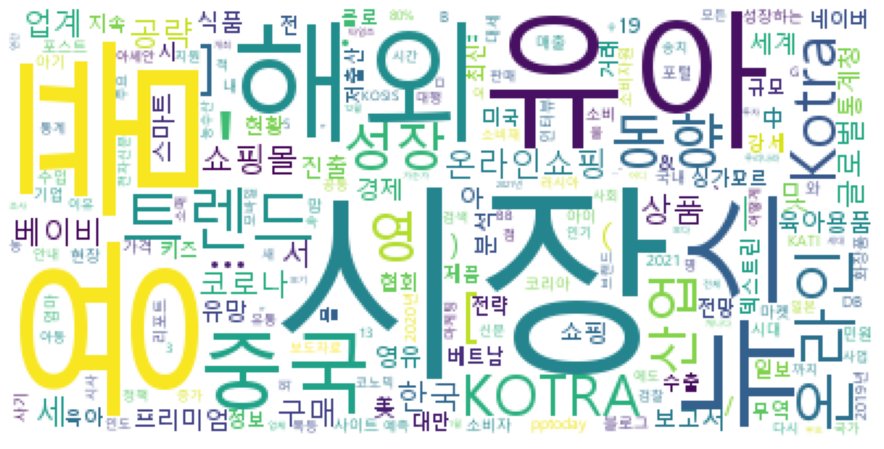

In [22]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path='C:\Windows\Fonts/malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',).generate_from_frequencies(ko.vocab())

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
!pip install graphviz

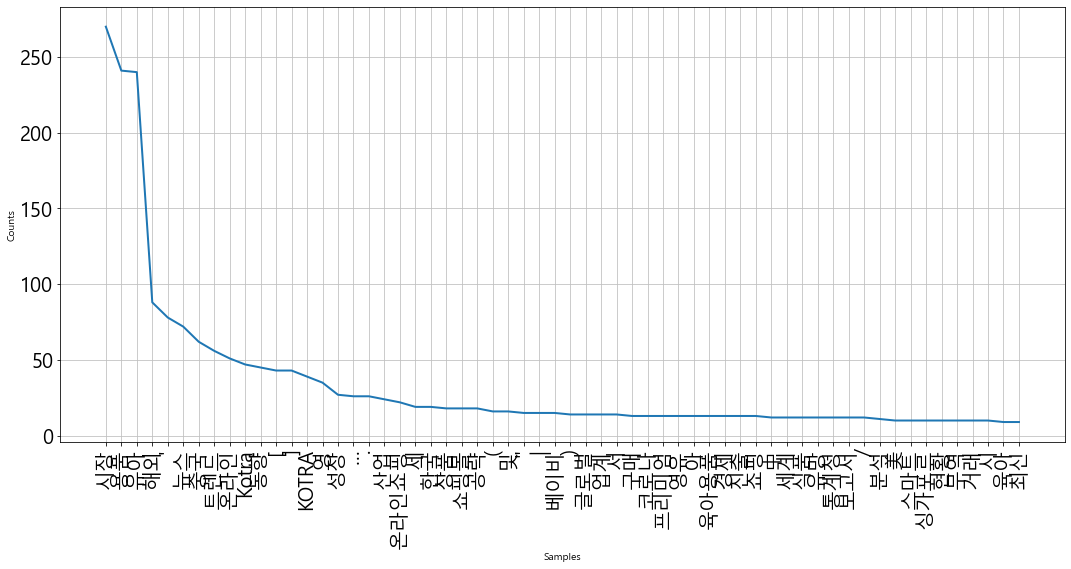

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

plt.figure(figsize=(18,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ko.plot(60)
plt.show()